In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy

import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

dyn.get_all_dependencies_version()

package,umap-learn,pynndescent,python-igraph,numdifftools,seaborn,statsmodels,numba,dynamo-release,scikit-learn,cvxopt,scipy,numpy,networkx,pre-commit,colorcet,loompy,openpyxl,matplotlib,get-version,tqdm,setuptools,pandas
version,0.5.3,0.5.7,0.9.11,0.9.40,0.11.2,0.13.2,0.55.2,1.1.0,1.1.1,1.3.0,1.8.1,1.22.4,2.8.4,2.19.0,3.0.0,3.0.7,3.0.10,3.5.2,3.5.4,4.64.0,61.2.0,1.3.5


In [65]:
adata = dyn.read_h5ad('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(type(adata.obs['clusters']))
print(adata)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [66]:
# scanpy.pp.filter_genes(adata, min_cells=1, max_cells=None) 
# print(adata.shape)

# s = adata.to_df(layer='spliced')
# u = adata.to_df(layer='unspliced')

# # print(s.shape)
# # print(u.shape)

# u = u.loc[:,(u!=0).any(axis=0)]
# print(u.columns)
# print(u.shape)

# var_name = u.columns

# # print(adata.var)
# adata = adata[:,adata.var.index.isin(var_name)]
# print(adata.shape)

# s = adata.to_df(layer='spliced')
# u = adata.to_df(layer='unspliced')
# print(s.shape)
# print(u.shape)
# data = adata.X
# data = pd.DataFrame.sparse.from_spmatrix(data)

In [67]:
# import magic
# magic_op = magic.MAGIC()
# data_est = magic_op.fit_transform(data, genes='all_genes')

# s_emt_magic = magic_op.fit_transform(s, genes='all_genes')
# u_emt_magic = magic_op.fit_transform(u, genes='all_genes')

In [68]:
# import scipy
# # spliced = scanpy.AnnData(s)
# spliced = scipy.sparse.csr_matrix(s_emt_magic.values)
# unspliced = scipy.sparse.csr_matrix(u_emt_magic.values)
# # dataX = unspliced = scipy.sparse.csr_matrix(data_est.values)


# adata.layers['spliced'] = spliced
# adata.layers['unspliced'] = unspliced
# # adata.X = dataX

# print(adata.X)

In [69]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [70]:
dyn.tl.dynamics(adata,model='stochastic')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [12.2674s]


estimating gamma: 100%|██████████| 2000/2000 [01:43<00:00, 19.29it/s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

In [71]:
data = adata.X
import magic
import scipy

magic_op = magic.MAGIC()

data_est = magic_op.fit_transform(data, genes='all_genes')

velocity = scipy.sparse.csr_matrix(data_est)

adata.X = velocity

Calculating MAGIC...
  Running MAGIC on 2930 cells and 13913 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.57 seconds.
    Calculating affinities...
    Calculated affinities in 2.76 seconds.
  Calculated graph and diffusion operator in 6.32 seconds.
  Running MAGIC with `solver='exact'` on 13913-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 3.70 seconds.
Calculated MAGIC in 10.19 seconds.


In [72]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.2868s]


In [73]:
# dyn.tl.cell_velocities(adata)
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'}, enforce=True, basis='umap')

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [10.1466s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [1.0515s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u

In [74]:
# dyn.vf.VectorField(adata,basis = 'umap')
dyn.tl.cell_wise_confidence(adata)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', '

|-----------> plotting with basis key=X_umap
|-----------> skip filtering clusters by stack threshold when stacking color because it is not a numeric type


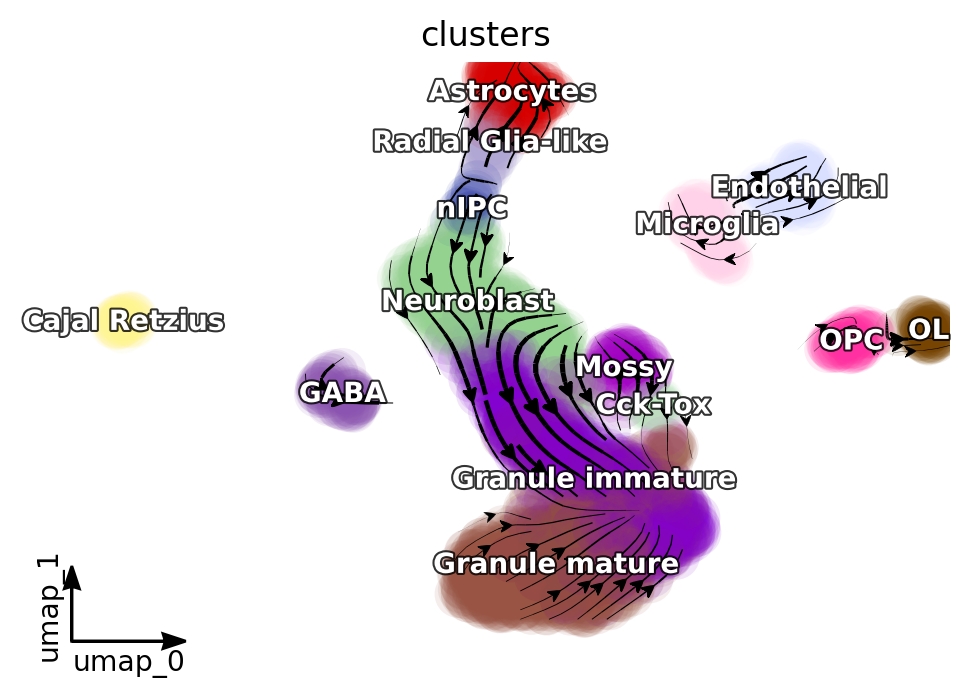

In [75]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 4))
# f1_axes[0] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[0], show_legend='right', save_show_or_return='return')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)
# f1_axes[0].set_title('splicing')
# f1_axes[1] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[1], show_legend='right', save_show_or_return='return')
# f1_axes[1].set_title('labeling')
plt.show()

In [76]:
import eval_util
from imp import reload
reload(eval_util)

cluster_edges = [("OPC", "OL")]
eval_util.evaluate(adata, cluster_edges, 'clusters', "velocity_S", x_emb="X_umap")

# Cross-Boundary Transition Score (A->B)
{('OPC', 'OL'): 0.0007636858717174944}
Total Mean: 0.0007636858717174944
# Cross-Boundary Velocity Coherence (A->B)
{('OPC', 'OL'): 0.4420010781070512}
Total Mean: 0.4420010781070512
# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): -0.9142258949923765}
Total Mean: -0.9142258949923765
# In-cluster Coherence
{'Astrocytes': 0.8404786138364982, 'Cajal Retzius': 0.9868506177323572, 'Cck-Tox': 0.9585451849717558, 'Endothelial': 0.9465633033120361, 'GABA': 0.9382579160731018, 'Granule immature': 0.9179606705973081, 'Granule mature': 0.8854707117489544, 'Microglia': 0.9811293318788896, 'Mossy': 0.9401394322893869, 'Neuroblast': 0.9539555500036697, 'OL': 0.9363203317599943, 'OPC': 0.9322416676107653, 'Radial Glia-like': 0.9077368370279092, 'nIPC': 0.9486775081921204}
Total Mean: 0.9338805483596249
# In-cluster Confidence
{'Astrocytes': 0.684809125531135, 'Cajal Retzius': 0.9146193812860479, 'Cck-Tox': 0.39457407558822594, 'Endothelial': 0.75

{'Cross-Boundary Transition Score (A->B)': {('OPC',
   'OL'): [-0.0010162561803137668, 0.002269882200229452, -0.004127840128740447, -5.124387942309462e-05, 0.004920193517109088, 0.004484930120162038, -0.0011338645470008097]},
 'Cross-Boundary Velocity Coherence (A->B)': {('OPC',
   'OL'): [0.4187482518020107, 0.4755703019102984, 0.4369120713617314, 0.45078977915692786, 0.45295157375053713, 0.4136841325206539, 0.445351436247199]},
 'Cross-Boundary Direction Correctness (A->B)': {('OPC',
   'OL'): [-0.9775788115320043, -0.7825933963387903, -0.9975440927836287, -0.9728440883489956, -0.7010860564097953, -0.9762532651816648, -0.9916815543517563]},
 'In-cluster Coherence': {'Astrocytes': [0.7756701501740182,
   0.8645825994695505,
   0.7291033931305341,
   0.9005063610563546,
   0.8142996160574965,
   0.8363489869047782,
   0.9013865564789778,
   0.8826064828148681,
   0.8423585685225975,
   0.8833801692370628,
   0.8190685560866009,
   0.8006798043576328,
   0.8451504252815828,
   0.8686597